In [ ]:
#I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

In [ ]:
!pip install gym

# **Defining RL Environment**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import spaces

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

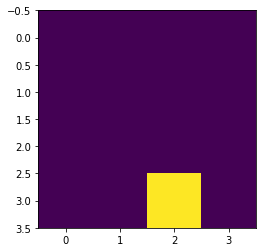

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import widgets
import time

output_grid = widgets.Grid(1, 1)
for _ in range(5):
  grid = np.zeros((4, 4))
  grid[np.random.randint(4), np.random.randint(4)] = 1
  with output_grid.output_to(0, 0):
    output_grid.clear_cell()
    plt.imshow(grid)
  time.sleep(1)

In [ ]:
grid = np.zeros((4, 4))
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
pos1 = [3, 0]
pos2 = [0, 3]
pos3 = [1,2]
pos4 = [0,2]
pos5 = [2,3]
pos6 = [2,0]


grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5
grid[tuple(pos3)] = 0.3
grid[tuple(pos4)] = 0.3
grid[tuple(pos5)] = 0.6
grid[tuple(pos6)] = 0.6



print(grid)

[[0.  0.  0.3 0.5]
 [0.  0.  0.3 0. ]
 [0.6 0.  0.  0.6]
 [1.  0.  0.  0. ]]


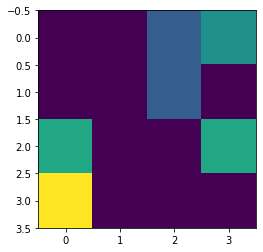

In [ ]:
plt.imshow(grid)

In [ ]:
class GridEnvironment(gym.Env):
  metadata = { 'render.modes': []}

  def __init__(self):
    self.observation_space = spaces.Discrete(16)
    self.action_space = spaces.Discrete(4)
    self.max_timesteps = 10

  def reset(self):
    self.timestep = 0
    self.agent_pos = [3, 0]
    self.goal_pos = [0, 3]
    self.state = np.zeros((4, 4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    self.state[tuple(pos3)] = 0.3
    self.state[tuple(pos4)] = 0.3
    self.state[tuple(pos5)] = 0.6
    self.state[tuple(pos6)] = 0.6

    observation = self.state.flatten()
    return observation

  def step(self, action):
    self.state = np.random.choice(self.observation_space.n)
    if action == 0:
      self.agent_pos[0] += 1
    if action == 1:
      self.agent_pos[0] -= 1
    if action == 2:
      self.agent_pos[1] += 1
    if action == 3:
      self.agent_pos[1] -= 1
    
    self.agent_pos = np.clip(self.agent_pos, 0, 2)
    self.state = np.zeros((4,4))
    self.state[tuple(self.agent_pos)] = 1
    self.state[tuple(self.goal_pos)] = 0.5
    observation = self.state.flatten()

    reward = 0
    if (self.agent_pos == self.goal_pos).all():
      reward = 6
    elif (self.agent_pos == (0,2)).all():
      reward = 4
    elif (self.agent_pos == (1,2)).all():
      reward = 2
    elif (self.agent_pos == (2,3)).all():
      reward = -4
    elif (self.agent_pos == (2,0)).all():
      reward = -2

    self.timestep += 1
    done = True if self.timestep >= self.max_timesteps else False
    info = {}

    return observation, reward, done, info

  def render(self):
    plt.imshow(self.state)

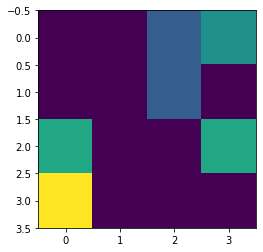

In [ ]:
env = GridEnvironment()
obs = env.reset()
env.render()

In [ ]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, observation):
    n=10
    return np.random.choice(self.action_space.n)

# **Timesteps**

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ] 
Action 2 
Reward 0


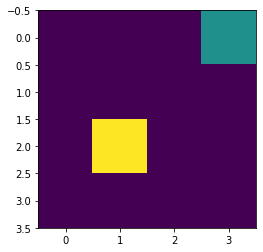

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  0.  0.  0.5 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 1 
Reward 0


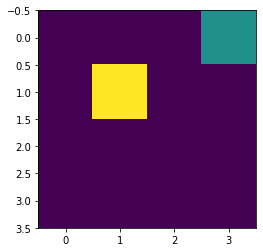

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ] 
Action 0 
Reward 0


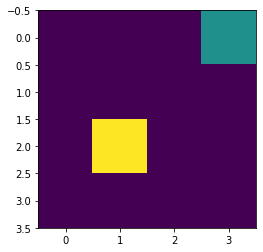

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  0.  0.  0.5 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 1 
Reward 0


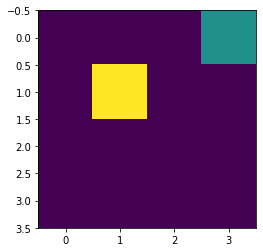

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  1.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 1 
Reward 0


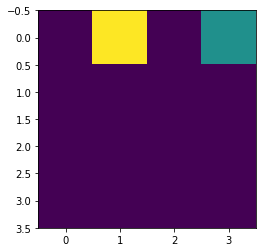

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  1.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 1 
Reward 0


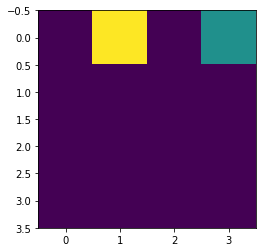

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  1.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 1 
Reward 0


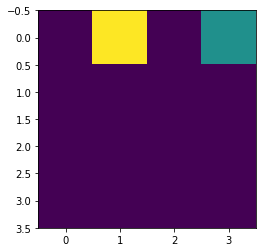

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  0.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 2 
Reward 4


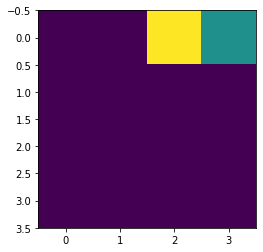

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  0.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 2 
Reward 4


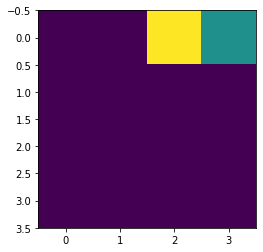

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

State
 [0.  1.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ] 
Action 3 
Reward 0


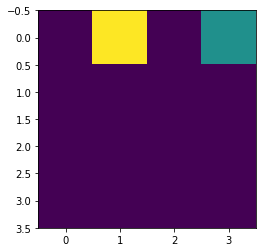

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

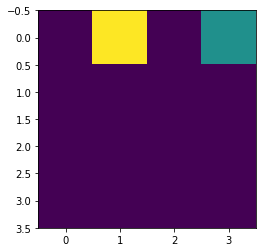

<IPython.core.display.Javascript object>

In [ ]:
env = GridEnvironment()
agent = RandomAgent(env)

obs = env.reset()
done = False

output_grid = widgets.Grid(1, 1)
with output_grid.output_to(0, 0):
  env.render()

for i in range(0,11):
  while not done:
    action = agent.step(obs)
    obs, reward, done, info = env.step(action)
    print("State\n",obs,"\nAction",action, "\nReward",reward)
    env.render()
    with output_grid.output_to(0, 0):
      output_grid.clear_cell()
      env.render()
    time.sleep(1)